In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import pandas as pd
import xrft as xrft
import warnings
import scipy.signal as sig
import sys
import seaborn as sns
import gsw as gsw
sys.path.append("/homes/metogra/iufarias/FeedbackSubmeso/useful/")
import romspickle
# import seawater as sw

from dask.diagnostics import ProgressBar

warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lucida Grande']

In [3]:
dxx=1.5

In [4]:
path='/data/pacific/lrenault/SASI/CROCO/FULL/'
listm=glob(path+'surf*.nc');listm.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varf=xr.open_mfdataset(listm[1:],data_vars='minimal')

path='/data/pacific/lrenault/SASI/CROCO/SMTH/'
listt=glob(path+'surf*SASI_6h_his_20*_*.nc');listt.sort()
listt.append('/data/pacific/lrenault/SASI/CROCO/SMTH/surf_SASI_6h_his_2012-07.nc')
#vart=xr.open_dataset(listt[xmon])
vart=xr.open_mfdataset(listt[1:],data_vars='minimal')

In [5]:
chunks_new={'time_counter':40}

path='/data/pacific/lrenault/SASI/FULL/WRF/'
listmw=glob(path+'wrf_*.nc');listmw.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varfw=xr.open_mfdataset(listmw[::2][-7:],chunks=chunks_new)

path='/data/pacific/lrenault/SASI/SMTH/WRF/'
listtw=glob(path+'wrf_*.nc');listtw.sort()
#vart=xr.open_dataset(listt[xmon])
vartw=xr.open_mfdataset(listtw[::2][-7:],chunks=chunks_new)

In [ ]:
sst_f=varfw.SST.compute()
sst_t=vartw.SST.compute()

In [17]:
nf=1
wdws='hann' #'flattop','hann'
wdw_cor=True
scl='density'



T_SMTH=xrft.isotropic_power_spectrum(sst_t[:,:,30:-100].drop(['nav_lat', 'nav_lon']),
                                     dim=['y','x'],nfactor=nf,truncate='True',scaling=scl,detrend='linear',window=wdws,window_correction=wdw_cor)

T_FULL=xrft.isotropic_power_spectrum(sst_f[:,:,30:-100].drop(['nav_lat', 'nav_lon']),
                                     dim=['y','x'],nfactor=nf,truncate='True',scaling=scl,detrend='linear',window=wdws,window_correction=wdw_cor)



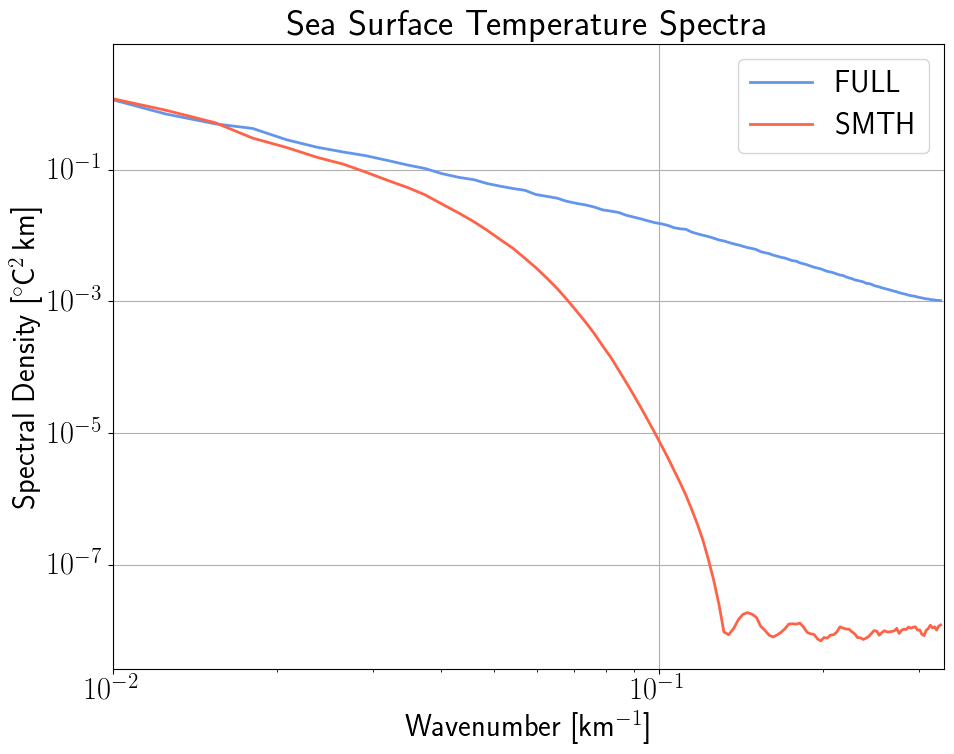

In [26]:




plt.figure(figsize=(10,8))
plt.plot(T_FULL.freq_r/1.5,T_FULL.mean(axis=0)*1.5,label='FULL',linewidth=2,color='cornflowerblue')
plt.plot(T_SMTH.freq_r/1.5,T_SMTH.mean(axis=0)*1.5,label='SMTH',linewidth=2,color='tomato')
# plt.plot([1/25,1/25],[1,1e-8],'g--',label='25km')
# plt.plot([1/50,1/50],[1,1e-8],'y--',label='50km')
# plt.plot([1/65,1/65],[1,1e-8],'k--',label='65km')

plt.grid()
plt.ylabel(r'Spectral Density [$^{\circ}$C$^{2}\,$km]',fontweight='bold')
plt.xlabel('Wavenumber [km$^{-1}$]')
plt.title('Sea Surface Temperature Spectra')
plt.legend()

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2,1/3)
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/figures/poster/SST_spec_comparison.png',dpi=200,bbox_inches='tight')

